<a href="https://colab.research.google.com/github/Vai7h/Phishing-detection/blob/main/XGBoost_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt # For embedding plots into applications
from pandas import DataFrame
import os
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

MessageError: ignored

In [ ]:
data = pd.read_csv("phishing.csv")

FileNotFoundError: ignored

In [ ]:
xgbcl = XGBClassifier(max_depth=10,colsample_bytree=0.8,gamma=0.8,scale_pos_weight=0.9,subsample=1,n_estimators=100)

In [ ]:
target=data['class']
features=data.drop(['class'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size = 0.3,random_state = 200)

In [ ]:
X_train=X_train.drop(['Index'],axis=1)
X_test=X_test.drop(['Index'],axis=1)

In [ ]:
xgbcl.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.8, gamma=0.8, max_depth=10,
              scale_pos_weight=0.9)

In [ ]:
predictions = xgbcl.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, predictions)
print('Confusion Matrix: ')
print(cm_rf)

Confusion Matrix: 
[[1393   63]
 [  57 1804]]


In [ ]:
tp = cm_rf[0,0]
fn = cm_rf[0,1]
fp = cm_rf[1,0]
tn = cm_rf[1,1]
p = tp + fn
n = fp + tn

accuracy_all = (tp + tn) / (p + n)
error_rate = (fp + fn) / (p + n)
sensitivity = tp /p
specificity = tn / n
precision = tp / (tp + fp)
f1_score_all = (2 * precision * sensitivity)/ (precision + sensitivity)


print("accuracy",accuracy_all)
print("error",error_rate)
print("sensitivity",sensitivity)
print("specificity",specificity)
print("precision",precision)
print("f1",f1_score_all)

accuracy 0.9638227313837805
error 0.03617726861621948
sensitivity 0.9567307692307693
specificity 0.969371305749597
precision 0.9606896551724138
f1 0.9587061252580867


In [ ]:
imp_features =pd.Series(xgbcl.feature_importances_,index= X_train.columns).sort_values(ascending = False)
imp_features

HTTPS                  0.438861
AnchorURL              0.208637
PrefixSuffix-          0.065951
ServerFormHandler      0.024648
LinksInScriptTags      0.023195
WebsiteTraffic         0.020803
ShortURL               0.017669
SubDomains             0.014778
UsingPopupWindow       0.013054
GoogleIndex            0.011139
UsingIP                0.010280
DomainRegLen           0.009947
LinksPointingToPage    0.009879
RequestURL             0.009644
PageRank               0.009127
DisableRightClick      0.009055
AbnormalURL            0.009021
InfoEmail              0.009015
DNSRecording           0.008680
AgeofDomain            0.008359
LongURL                0.008135
IframeRedirection      0.007518
HTTPSDomainURL         0.007508
Redirecting//          0.006960
NonStdPort             0.006931
StatusBarCust          0.006868
StatsReport            0.006737
WebsiteForwarding      0.006216
Favicon                0.006063
Symbol@                0.005322
dtype: float32

In [ ]:
for x in imp_features.axes[0][15:30]: # Dropping 15 least imp features
  X_train = X_train.drop([x], axis = 1)

for x in imp_features.axes[0][15:30]:
  X_test = X_test.drop([x], axis = 1)

In [ ]:
i = 0 # To check if X_train has the 15 most imp features
for x in X_train.columns.tolist():
  i = i+1
  print (str(i) + ". " + x)

1. UsingIP
2. ShortURL
3. PrefixSuffix-
4. SubDomains
5. HTTPS
6. DomainRegLen
7. RequestURL
8. AnchorURL
9. LinksInScriptTags
10. ServerFormHandler
11. UsingPopupWindow
12. WebsiteTraffic
13. PageRank
14. GoogleIndex
15. LinksPointingToPage


In [ ]:
# fit model no training data
model_15 = XGBClassifier(max_depth=8,colsample_bytree=0.7,gamma=0.7,scale_pos_weight=1,min_child_weight=0.4,subsample=1,max_delta_step=1,n_estimators=270)
model_15.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.7, gamma=0.7, max_delta_step=1, max_depth=8,
              min_child_weight=0.4, n_estimators=270, random_state=200)

In [ ]:
predictions_15 = model_15.predict(X_test)

In [ ]:
#Confusion matrix
cm_rf_15 = confusion_matrix(y_test, predictions_15)
print('Confusion Matrix: ')
print(cm_rf_15)

tp_15 = cm_rf_15[0,0]
fn_15 = cm_rf_15[0,1]
fp_15 = cm_rf_15[1,0]
tn_15 = cm_rf_15[1,1]
p_15 = tp_15 + fn_15
n_15 = fp_15 + tn_15

accuracy_15 = (tp_15 + tn_15) / (p_15 + n_15)
error_rate_15 = (fp_15 + fn_15) / (p_15 + n_15)
sensitivity_15 = tp_15 /p_15
specificity_15 = tn_15 / n_15
precision_15 = tp_15 / (tp_15 + fp_15)
f1_score_15 = (2 * precision_15 * sensitivity_15)/ (precision_15 + sensitivity_15)

print("accuracy",accuracy_15)
print("error",error_rate_15)
print("sensitivity",sensitivity_15)
print("specificity",specificity_15)
print("precision",precision_15)
print("f1",f1_score_15)

Confusion Matrix: 
[[1393   63]
 [  69 1792]]
accuracy 0.9602050045221586
error 0.039794995477841426
sensitivity 0.9567307692307693
specificity 0.9629231595916175
precision 0.9528043775649795
f1 0.9547635366689513


In [ ]:
for x in imp_features.axes[0][10:15]:  # To drop 5 least imp features
  X_train = X_train.drop([x], axis = 1)

for x in imp_features.axes[0][10:15]:
  X_test = X_test.drop([x], axis = 1)

In [ ]:
i = 0 # To check if X_train has the 10 most imp features
for x in X_train.columns.tolist():
  i = i+1
  print (str(i) + ". " + x)

1. ShortURL
2. PrefixSuffix-
3. SubDomains
4. HTTPS
5. AnchorURL
6. LinksInScriptTags
7. ServerFormHandler
8. UsingPopupWindow
9. WebsiteTraffic
10. GoogleIndex


In [ ]:
# fit model no training data
model_10 = XGBClassifier(max_depth=8,colsample_bytree=0.7,n_estimators= 280,random_state=0)
model_10.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.7, max_depth=8, n_estimators=280,
              random_state=200)

In [ ]:
predictions_10 = model_10.predict(X_test)

In [ ]:
#Confusion matrix
cm_rf = confusion_matrix(y_test, predictions_10)
print('Confusion Matrix: ')
print(cm_rf)

tp_10 = cm_rf[0,0]
fn_10 = cm_rf[0,1]
fp_10 = cm_rf[1,0]
tn_10 = cm_rf[1,1]
p_10 = tp_10 + fn_10
n_10 = fp_10 + tn_10

accuracy_10 = (tp_10 + tn_10) / (p_10 + n_10)
error_rate_10 = (fp_10 + fn_10) / (p_10 + n_10)
sensitivity_10 = tp_10 /p_10
specificity_10 = tn_10 / n_10
precision_10 = tp_10 / (tp_10 + fp_10)
f1_score_10 = (2 * precision_10 * sensitivity_10)/ (precision_10 + sensitivity_10)

print("accuracy",accuracy_10)
print("error",error_rate_10)
print("sensitivity",sensitivity_10)
print("specificity",specificity_10)
print("precision",precision_10)
print("f1",f1_score_10)

Confusion Matrix: 
[[1376   80]
 [  91 1770]]
accuracy 0.9484473922218872
error 0.051552607778112755
sensitivity 0.945054945054945
specificity 0.9511015583019882
precision 0.9379686434901159
f1 0.9414984604858023


In [ ]:
for x in imp_features.axes[0][5:10]:  # To drop 5 least imp features
  X_test = X_test.drop([x], axis = 1)

for x in imp_features.axes[0][5:10]:
  X_train = X_train.drop([x], axis = 1)

In [ ]:
i = 0 # To check if X_train has the 5 most imp features
for x in X_train.columns.tolist():
  i = i+1
  print (str(i) + ". " + x)

1. PrefixSuffix-
2. HTTPS
3. AnchorURL
4. LinksInScriptTags
5. ServerFormHandler


In [ ]:
# fit model no training data
model_5 = XGBClassifier(max_depth=10,colsample_bytree=1,scale_pos_weight=0.8,n_estimators=280,random_state=0)
model_5.fit(X_train, y_train)

XGBClassifier(max_depth=10, n_estimators=280, random_state=200,
              scale_pos_weight=0.8)

In [ ]:
# make predictions for test data
predictions_5 = model_5.predict(X_test)

In [ ]:
#Confusion matrix
cm_rf = confusion_matrix(y_test, predictions_5)
print('Confusion Matrix: ')
print(cm_rf)

tp_5 = cm_rf[0,0]
fn_5 = cm_rf[0,1]
fp_5 = cm_rf[1,0]
tn_5 = cm_rf[1,1]
p_5 = tp_5 + fn_5
n_5 = fp_5 + tn_5

accuracy_5 = (tp_5 + tn_5) / (p_5 + n_5)
error_rate_5 = (fp_5 + fn_5) / (p_5 + n_5)
sensitivity_5 = tp_5 /p_5
specificity_5 = tn_5 / n_5
precision_5 = tp_5 / (tp_5 + fp_5)
f1_score_5 = (2 * precision_5 * sensitivity_5)/ (precision_5 + sensitivity_5)

print("accuracy",accuracy_5)
print("error",error_rate_5)
print("sensitivity",sensitivity_5)
print("specificity",specificity_5)
print("precision",precision_5)
print("f1",f1_score_5)

Confusion Matrix: 
[[1306  150]
 [ 101 1760]]
accuracy 0.9243292131444076
error 0.0756707868555924
sensitivity 0.896978021978022
specificity 0.9457281031703385
precision 0.9282160625444208
f1 0.9123297240656655


In [ ]:
matrix = [[accuracy_all, error_rate, sensitivity, specificity, precision, f1_score_all],
          [accuracy_15, error_rate_15, sensitivity_15, specificity_15, precision_15, f1_score_15],
          [accuracy_10, error_rate_10, sensitivity_10, specificity_10, precision_10, f1_score_10],
          [accuracy_5, error_rate_5, sensitivity_5, specificity_5, precision_5, f1_score_5]]

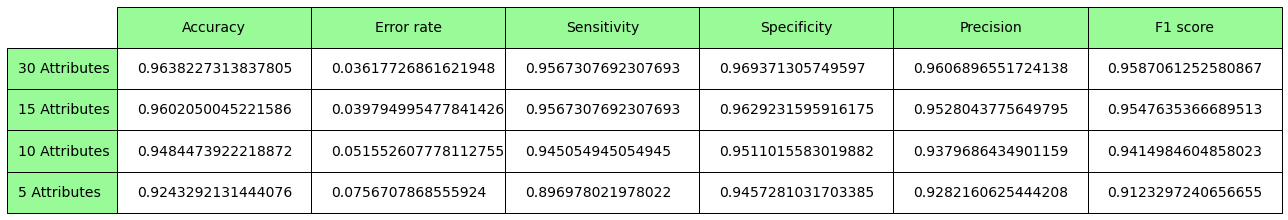

In [ ]:
plt.rcParams["figure.figsize"] = [18.00, 2.50]
plt.rcParams["figure.autolayout"] = True
fig, axs = plt.subplots(1, 1)
class_names = ['30 Attributes', '15 Attributes', '10 Attributes', '5 Attributes']
evaluation_metrics = ['Accuracy', 'Error rate', 'Sensitivity', 'Specificity', 'Precision', 'F1 score']
axs.axis('tight')
axs.axis('off')
table = axs.table(cellText=matrix,
                      cellLoc = 'left',
                      rowLabels = class_names,
                      rowColours= ["palegreen"] * 10,
                      colLabels=evaluation_metrics,
                      colColours= ["palegreen"] * 10,
                      loc='center')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 4)
fig.tight_layout()
plt.show()